# Purpose:
To gather the mute list usage before special mute feature is launched (T244398)

# Data timeframe:
2019-01 ~ 2020-01

# Summary:
 - Before the launch, the average usage of mute list is typically around 100+ per month.
 - Enwiki is the top one wiki that mostly used mute list

In [1]:
import datetime as dt
import pandas as pd
from wmfdata import hive
import numpy as np

You are using wmfdata 0.1.0 (latest).

You can find the source for `wmfdata` at https://github.com/neilpquinn/wmfdata


__1. Monthly mute usage across all wikis from 2019-01 to 2020-01__

In [2]:
monthly_mute_usage_2019_2020_query = '''
SELECT  substr( dt, 1, 7)  AS year_month, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate 
WHERE year >= '2019' 
AND array_contains(array(event.property),'echo-notifications-blacklist') AND event.value  != 'null'
GROUP BY  year_month
HAVING year_month != '2020-02'
ORDER BY year_month
'''

In [4]:
monthly_mute_usage_2019_2020 = hive.run(monthly_mute_usage_2019_2020_query)

In [5]:
monthly_mute_usage_2019_2020

,year_month,mute_count
0,2019-01,176
1,2019-02,167
2,2019-03,150
3,2019-04,109
4,2019-05,136
5,2019-06,137
6,2019-07,129
7,2019-08,120
8,2019-09,187
9,2019-10,77


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

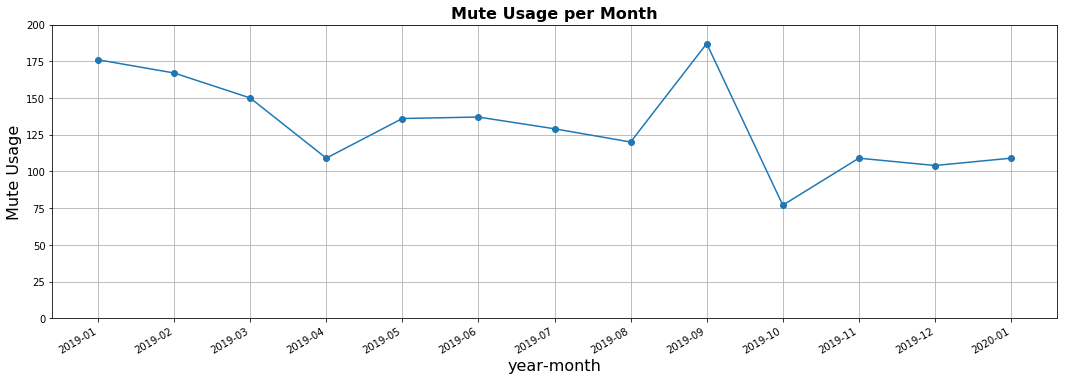

In [7]:
plt.figure(figsize=(18, 6))
plt.ylim(0, 200)
plt.grid(True)
plt.title('Mute Usage per Month',fontweight="bold",fontsize = 16)
plt.xlabel('year-month',fontsize = 16)
plt.ylabel('Mute Usage',fontsize = 16)
plt.gcf().autofmt_xdate()
plt.plot(monthly_mute_usage_2019_2020['year_month'],monthly_mute_usage_2019_2020['mute_count'], 'o-' )
plt.savefig("mute_usage_per_month_trend.png")
plt.show()

__2. Top 20 mute usage by wiki from 2019-01 to 2019-12__

In [8]:
mute_usage_per_wiki_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' 
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 20
'''

In [9]:
mute_usage_per_wiki_2019 = hive.run(mute_usage_per_wiki_query)

In [10]:
mute_usage_per_wiki_2019

,wiki,mute_count
0,enwiki,580
1,commonswiki,75
2,dewiki,72
3,mediawikiwiki,72
4,eswiki,70
5,zhwiki,60
6,frwiki,54
7,jawiki,52
8,metawiki,51
9,ruwiki,30


__2.1 Top 10 mute usage by wiki in 2019-01__

In [11]:
mute_usage_per_wiki_201901_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' AND month = '1'
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 10
'''

In [12]:
mute_usage_per_wiki_201901 = hive.run(mute_usage_per_wiki_201901_query)
mute_usage_per_wiki_201901

,wiki,mute_count
0,enwiki,61
1,mediawikiwiki,17
2,frwiki,8
3,dewiki,8
4,mswiki,6
5,commonswiki,6
6,ruwiki,6
7,jawiki,6
8,zhwiki,6
9,eswiki,6


__2.2 Top 10 mute usage by wiki in 2019-02__

In [48]:
mute_usage_per_wiki_201902_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' AND month = '2'
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 10
'''
mute_usage_per_wiki_201902 = hive.run(mute_usage_per_wiki_201902_query)
mute_usage_per_wiki_201902

,wiki,mute_count
0,enwiki,74
1,zhwiki,9
2,commonswiki,8
3,fawiki,8
4,enwiktionary,6
5,frwiki,5
6,viwiki,5
7,eswiki,4
8,ruwiki,4
9,mediawikiwiki,4


__2.3 Top 10 mute usage by wiki in 2019-03__

In [49]:
mute_usage_per_wiki_201903_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' AND month = '3'
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 10
'''
mute_usage_per_wiki_201903 = hive.run(mute_usage_per_wiki_201903_query)
mute_usage_per_wiki_201903

,wiki,mute_count
0,enwiki,58
1,commonswiki,7
2,eswiki,7
3,frwiki,6
4,idwiki,5
5,zhwiki,5
6,urwiki,5
7,mediawikiwiki,5
8,dewiki,5
9,metawiki,4


__2.4 Top 10 mute usage by wiki in 2019-04__

In [50]:
mute_usage_per_wiki_201904_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' AND month = '4'
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 10
'''
mute_usage_per_wiki_201904 = hive.run(mute_usage_per_wiki_201904_query)
mute_usage_per_wiki_201904

,wiki,mute_count
0,enwiki,26
1,mediawikiwiki,10
2,commonswiki,7
3,huwiki,6
4,dewiki,5
5,metawiki,5
6,jawiki,5
7,zhwiki,4
8,eswiki,4
9,frwiki,4


__2.5 Top 10 mute usage by wiki in 2019-05__

In [51]:
mute_usage_per_wiki_201905_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' AND month = '5'
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 10
'''
mute_usage_per_wiki_201905 = hive.run(mute_usage_per_wiki_201905_query)
mute_usage_per_wiki_201905

,wiki,mute_count
0,enwiki,36
1,commonswiki,10
2,mediawikiwiki,9
3,dewiki,8
4,eswiki,6
5,jawiki,6
6,bnwiki,5
7,metawiki,4
8,mswiki,4
9,elwiki,4


__2.6 Top 10 mute usage by wiki in 2019-06__

In [52]:
mute_usage_per_wiki_201906_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' AND month = '6'
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 10
'''
mute_usage_per_wiki_201906 = hive.run(mute_usage_per_wiki_201906_query)
mute_usage_per_wiki_201906

,wiki,mute_count
0,enwiki,47
1,eswiki,12
2,zhwiki,10
3,dewiki,7
4,jawiki,7
5,viwiki,5
6,commonswiki,5
7,frwiki,4
8,ruwiki,4
9,hewiki,3


__2.7 Top 10 mute usage by wiki in 2019-07__

In [53]:
mute_usage_per_wiki_201907_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' AND month = '7'
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 10
'''
mute_usage_per_wiki_201907 = hive.run(mute_usage_per_wiki_201907_query)
mute_usage_per_wiki_201907

,wiki,mute_count
0,enwiki,61
1,zhwiki,8
2,dewiki,8
3,eswiki,5
4,mediawikiwiki,4
5,ptwiki,4
6,commonswiki,4
7,metawiki,4
8,jawiki,3
9,enwiktionary,3


__2.8 Top 10 mute usage by wiki in 2019-08__

In [54]:
mute_usage_per_wiki_201908_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' AND month = '8'
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 10
'''
mute_usage_per_wiki_201908 = hive.run(mute_usage_per_wiki_201908_query)
mute_usage_per_wiki_201908

,wiki,mute_count
0,enwiki,42
1,dewiki,8
2,metawiki,7
3,commonswiki,6
4,frwiki,6
5,jawiki,6
6,eswiki,5
7,mediawikiwiki,4
8,hiwiki,4
9,zhwiki,4


__2.9 Top 10 mute usage by wiki in 2019-09__

In [55]:
mute_usage_per_wiki_201909_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' AND month = '9'
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 10
'''
mute_usage_per_wiki_201909 = hive.run(mute_usage_per_wiki_201909_query)
mute_usage_per_wiki_201909

,wiki,mute_count
0,enwiki,54
1,commonswiki,8
2,mediawikiwiki,6
3,idwiki,6
4,eswiki,6
5,jawiki,5
6,metawiki,5
7,bnwiki,4
8,simplewiki,4
9,hiwiki,3


__2.10 Top 10 mute usage by wiki in 2019-10__

In [57]:
mute_usage_per_wiki_201910_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' AND month = '10'
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 10
'''
mute_usage_per_wiki_201910 = hive.run(mute_usage_per_wiki_201910_query)
mute_usage_per_wiki_201910

,wiki,mute_count
0,enwiki,34
1,dewiki,8
2,frwiki,7
3,fawiki,4
4,jawiki,3
5,thwiki,3
6,ptwiki,3
7,ruwiki,2
8,hiwiki,2
9,commonswiki,2


__2.11 Top 10 mute usage by wiki in 2019-11__

In [58]:
mute_usage_per_wiki_201911_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' AND month = '11'
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 10
'''
mute_usage_per_wiki_201911 = hive.run(mute_usage_per_wiki_201911_query)
mute_usage_per_wiki_201911

,wiki,mute_count
0,enwiki,47
1,eswiki,9
2,metawiki,7
3,zhwiki,6
4,dewiki,5
5,frwiki,4
6,commonswiki,4
7,ptwiki,4
8,jawiki,4
9,fawiki,3


__2.12 Top 10 mute usage by wiki in 2019-12__

In [59]:
mute_usage_per_wiki_201912_query = '''
SELECT wiki, COUNT(*) AS mute_count
FROM event_sanitized.prefupdate
WHERE year = '2019' AND month = '12'
AND  event.value !='null' AND array_contains(array(event.property),'echo-notifications-blacklist')
GROUP BY wiki
ORDER BY mute_count DESC
LIMIT 10
'''
mute_usage_per_wiki_201912 = hive.run(mute_usage_per_wiki_201912_query)
mute_usage_per_wiki_201912

,wiki,mute_count
0,enwiki,40
1,mediawikiwiki,8
2,commonswiki,8
3,dewiki,5
4,metawiki,4
5,eswiki,4
6,jawiki,3
7,frwiki,3
8,labswiki,2
9,hiwiki,2
